In [2]:
pwd

'/Users/inceatakan/reader'

In [3]:
cd ..

/Users/inceatakan


In [4]:
cd Desktop/SPEECH_EMOTION_RECOGNITION/SARCASM_DETECTION

/Users/inceatakan/Desktop/SPEECH_EMOTION_RECOGNITION/SARCASM_DETECTION


In [5]:
'''INSTALL THE DATA'''
import pandas as pd
import numpy as np

sarcasm = pd.read_csv('total_data')

In [6]:
print(type(sarcasm))
sarcasm_input = sarcasm['input']

<class 'pandas.core.frame.DataFrame'>


In [7]:
print(type(sarcasm_input[0]))
sarcasm_input.head()

<class 'str'>


0                                        -1,1,0,0,-1,0
1                             -1,-1,0,-1,0,0,3,0,-1,-1
2                                   0,1,2,0,-1,-2,2,-3
3    2,2,-1,0,-1,1,-1,-1,1,-1,0,1,-1,0,-2,0,-1,1,1,...
4                                                    0
Name: input, dtype: object

In [8]:
'''Let us convert digits in string format into integer format'''
sarcasm_input['input'] = [[np.int32(item) for item in sarcasm_input['input'].split(',')] for sarcasm_input['input'] in sarcasm_input]
print(type(sarcasm_input['input']))
type(sarcasm_input)

<class 'list'>


/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


pandas.core.series.Series

In [9]:
'''Convert it into a numpy array'''
import numpy as np

import scipy
from keras.preprocessing.sequence import pad_sequences


# pad sequence
sarcasm_input['input'] = pad_sequences(sarcasm_input['input'], padding='post', value=5.0)
#sarcasm_input = np.array([np.array(xi) for xi in sarcasm_input])
sarcasm_input['input'] = sarcasm_input['input'].tolist()

/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [10]:
'''Convert the numpy array into a data frame'''

sarcasm['input'] = sarcasm_input['input']

In [11]:
print(len(sarcasm.input[0]))
sarcasm.head()

173


,Unnamed: 0,input,output
0,1,"[-1, 1, 0, 0, -1, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5...",1
1,2,"[-1, -1, 0, -1, 0, 0, 3, 0, -1, -1, 5, 5, 5, 5...",1
2,3,"[0, 1, 2, 0, -1, -2, 2, -3, 5, 5, 5, 5, 5, 5, ...",1
3,4,"[2, 2, -1, 0, -1, 1, -1, -1, 1, -1, 0, 1, -1, ...",1
4,5,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",1


In [12]:
sarcasm = sarcasm.drop(['Unnamed: 0'], axis=1)
sarcasm.head()

,input,output
0,"[-1, 1, 0, 0, -1, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5...",1
1,"[-1, -1, 0, -1, 0, 0, 3, 0, -1, -1, 5, 5, 5, 5...",1
2,"[0, 1, 2, 0, -1, -2, 2, -3, 5, 5, 5, 5, 5, 5, ...",1
3,"[2, 2, -1, 0, -1, 1, -1, -1, 1, -1, 0, 1, -1, ...",1
4,"[0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",1


In [105]:
'''Saving it into a csv file'''

sarcasm.to_csv('sarcasm', encoding='utf-8')

In [13]:
'''START THE WHOLE PROCESS FROM HERE'''

import pandas as pd

#sarcasm = pd.read_csv('sarcasm')
sarcasm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 2 columns):
input     1235 non-null object
output    1235 non-null int64
dtypes: int64(1), object(1)
memory usage: 19.4+ KB


In [14]:
'''Dividing Train/Test Split'''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

np.random.seed(5)

X = np.array(sarcasm.input.tolist())
y = np.array(sarcasm.output.tolist())

lb = LabelEncoder()

y = to_categorical(lb.fit_transform(y))

#X = sarcasm['input'].values
X = np.expand_dims(X, axis=2)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
print('X shape: ', X.shape)
#print(X[5])
#y = sarcasm['output'].values

print(type(X))
print(type(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)
print(type(X_train))
len(X_train[99])

X shape:  (1235, 173, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
X_train shape:  (988, 173, 1)
y_train shape:  (988, 2)
X_test shape:  (247, 173, 1)
y_test shape:  (247, 2)
<class 'numpy.ndarray'>


173

In [15]:
'''Model'''
from keras.callbacks import ModelCheckpoint
from keras.models import Model, load_model, Sequential
from keras.layers import Dense, Activation, Dropout, Input, Masking, TimeDistributed, LSTM, Conv1D
from keras.layers import GRU, Bidirectional, BatchNormalization, Reshape
from keras.optimizers import Adam, SGD
from keras import metrics

from keras import layers
from keras import callbacks
from keras.layers import Input, Dense, Activation, ZeroPadding1D, BatchNormalization, Flatten, Conv2D, Conv1D
from keras.layers import AveragePooling1D, MaxPooling1D, Dropout, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from kt_utils import *
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline



[0]


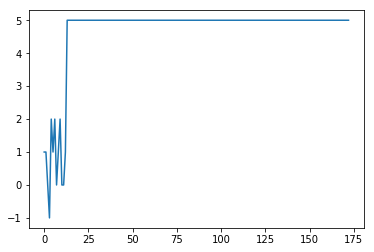

In [16]:
import pandas
import matplotlib.pyplot as plt
print(X[835][2])
plt.plot(X[835])
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 173, 1)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 170, 16)           80        
_________________________________________________________________
average_pooling1d_1 (Average (None, 43, 16)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 40, 8)             520       
_________________________________________________________________
average_pooling1d_2 (Average (None, 10, 8)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 9, 8)              136       
_________________________________________________________________
average_pooling1d_3 (Average (None, 3, 8)              0         
__________

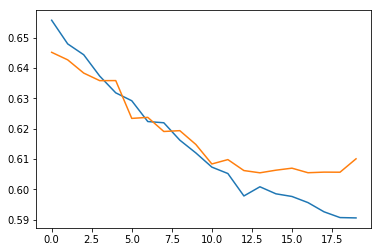

In [17]:
# Model 1: CNN

'''Use Masking to nullify of the effect of zeros added by Padding'''

np.random.seed(7)
'''
inp =  Input(shape=(173, 1))
#masked = Masking(5)(inp)
conv1 = Conv1D(filters=128, kernel_size=4)(inp)
pool1 = MaxPooling1D(pool_size=4)(conv1)
conv2 = Conv1D(filters=128, kernel_size=4)(pool1)
pool2 = MaxPooling1D(pool_size=4)(conv2)
conv3 = Conv1D(filters=128, kernel_size=2)(pool2)
pool3 = MaxPooling1D(pool_size=4)(conv3)
flat = Flatten()(pool3)
#dense = Dense(1)(flat)
dense = Dense(2, activation='sigmoid')(flat)
model = Model(inp, dense)
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=['accuracy'])
'''

inp =  Input(shape=(173, 1))
#masked = Masking(5)(inp)
conv1 = Conv1D(filters=16, kernel_size=4, activation='relu')(inp)
pool1 = AveragePooling1D(pool_size=4, padding='same')(conv1)
#pool1 = GlobalAveragePooling1D(data_format='channels_last')(conv1)
conv2 = Conv1D(filters=8, kernel_size=4, activation='relu')(pool1)
#conv2 = Dropout(0.5)(conv2)
pool2 = AveragePooling1D(pool_size=4, padding='same')(conv2)
conv3 = Conv1D(filters=8, kernel_size=2, activation='relu')(pool2)
#conv3 = Dropout(0.5)(conv3)
pool3 = AveragePooling1D(pool_size=4, padding='same')(conv3)
flat = Flatten()(pool3)
#dense = Dense(1)(flat)
dense = Dense(2, activation='sigmoid')(flat)
model = Model(inp, dense)
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
adam=Adam()
model.compile(optimizer=adam, loss="binary_crossentropy", metrics=['accuracy'])

print(model.summary())

# This checkpoint object will store the model parameters
# in the file "weights.hdf5"
checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss',
save_best_only=True) # Store in a list to be used during training
callbacks_list = [checkpoint]

# Fit the model on a training set, using the checkpoint as a callback
#model.fit(X_train, y_train, epochs = 200, batch_size = 8)
training = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=10, verbose=1,callbacks=callbacks_list)

# Extract the history from the training object
history = training.history

# Plot the training loss 
plt.plot(history['loss'])
# Plot the validation loss
plt.plot(history['val_loss'])

# Show the figure
plt.show()


In [18]:
### CNN Model on Test Data

preds = model.evaluate(x = X_test, y = y_test)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
#print(model.fit_generator(preds))

247/247 [==============================] - 0s 141us/step

Loss = 0.6100674421198455
Test Accuracy = 0.680161941871952


Train on 988 samples, validate on 247 samples
Epoch 1/20
988/988 [==============================] - 44s 44ms/step - loss: 0.6718 - acc: 0.6533 - val_loss: 0.6349 - val_acc: 0.7004
Epoch 2/20
988/988 [==============================] - 42s 42ms/step - loss: 0.6415 - acc: 0.7045 - val_loss: 0.6045 - val_acc: 0.6599
Epoch 3/20
988/988 [==============================] - 41s 41ms/step - loss: 0.5970 - acc: 0.6852 - val_loss: 0.6021 - val_acc: 0.7045
Epoch 4/20
988/988 [==============================] - 42s 43ms/step - loss: 0.5847 - acc: 0.7055 - val_loss: 0.5805 - val_acc: 0.6923
Epoch 5/20
988/988 [==============================] - 41s 41ms/step - loss: 0.5751 - acc: 0.6984 - val_loss: 0.5809 - val_acc: 0.7045
Epoch 6/20
988/988 [==============================] - 40s 40ms/step - loss: 0.5746 - acc: 0.7055 - val_loss: 0.5779 - val_acc: 0.7045
Epoch 7/20
988/988 [==============================] - 41s 42ms/step - loss: 0.5713 - acc: 0.7014 - val_loss: 0.5767 - val_acc: 0.7085
Epoch 8/20
988/9

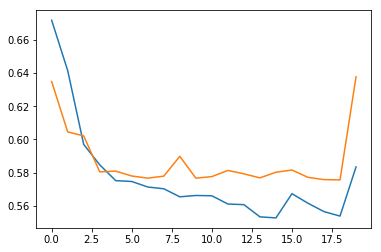

In [19]:
'''Model 2: LSTM'''
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers.embeddings import Embedding

#X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
#X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

np.random.seed(7)

#embedding_vecor_length = 32

data_dim = 173
timesteps = 1
num_classes = 2

model2 = Sequential()
model2.add(Masking(mask_value=5., input_shape=(data_dim, timesteps)))
model2.add(LSTM(30, return_sequences=True,
               activation='relu'))  # returns a sequence of vectors of dimension 30
model2.add(LSTM(30, return_sequences=True, activation='relu'))  # returns a sequence of vectors of dimension 30
model2.add(LSTM(30,activation='relu'))  # return a single vector of dimension 30
model2.add(Dense(2, activation='softmax'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  #optimizer='rmsprop'            
training2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 10, epochs = 20, verbose = 1, callbacks=callbacks_list)

print(model2.summary())

# Extract the history from the training object
history2 = training2.history

# Plot the training loss 
plt.plot(history2['loss'])
# Plot the validation loss
plt.plot(history2['val_loss'])

# Show the figure
plt.show()

In [20]:
preds2 = model2.evaluate(x = X_test, y = y_test)

print()
print ("Loss = " + str(preds2[0]))
print ("Test Accuracy = " + str(preds2[1]))
#print(model.fit_generator(preds))

247/247 [==============================] - 1s 3ms/step

Loss = 0.6377292511916837
Test Accuracy = 0.6842105284876187


Train on 988 samples, validate on 247 samples
Epoch 1/20
988/988 [==============================] - 55s 56ms/step - loss: 0.6144 - acc: 0.6791 - val_loss: 0.5833 - val_acc: 0.7206
Epoch 2/20
988/988 [==============================] - 48s 48ms/step - loss: 0.5706 - acc: 0.7126 - val_loss: 0.5882 - val_acc: 0.7085
Epoch 3/20
988/988 [==============================] - 47s 47ms/step - loss: 0.5664 - acc: 0.7186 - val_loss: 0.5793 - val_acc: 0.7004
Epoch 4/20
988/988 [==============================] - 48s 49ms/step - loss: 0.5588 - acc: 0.7298 - val_loss: 0.5767 - val_acc: 0.7004
Epoch 5/20
988/988 [==============================] - 45s 45ms/step - loss: 0.5508 - acc: 0.7287 - val_loss: 0.5747 - val_acc: 0.7045
Epoch 6/20
988/988 [==============================] - 45s 46ms/step - loss: 0.5551 - acc: 0.7237 - val_loss: 0.5802 - val_acc: 0.7045
Epoch 7/20
988/988 [==============================] - 46s 47ms/step - loss: 0.5443 - acc: 0.7348 - val_loss: 0.5792 - val_acc: 0.7126
Epoch 8/20
988/9

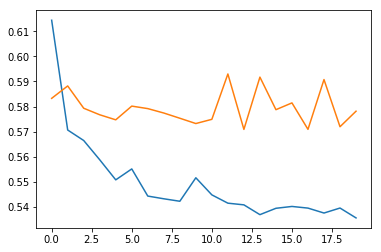

In [21]:
'''Model 3: BiLSTM'''
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers.embeddings import Embedding

#X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
#X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

np.random.seed(7)

#embedding_vecor_length = 32

data_dim = 173
timesteps = 1
num_classes = 2

model3 = Sequential()
model3.add(Masking(mask_value=5., input_shape=(data_dim, timesteps)))
model3.add(Bidirectional(LSTM(30, return_sequences=True,
               activation='relu')))  # returns a sequence of vectors of dimension 30
model3.add(Bidirectional(LSTM(30, return_sequences=True, activation='relu')))  # returns a sequence of vectors of dimension 30
model3.add(Bidirectional(LSTM(30,activation='relu')))  # return a single vector of dimension 30
model3.add(Dense(2, activation='softmax'))

model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  #optimizer='rmsprop'            
training3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 10, epochs = 20, verbose = 1, callbacks=callbacks_list)

print(model3.summary())

# Extract the history from the training object
history3 = training3.history

# Plot the training loss 
plt.plot(history3['loss'])
# Plot the validation loss
plt.plot(history3['val_loss'])

# Show the figure
plt.show()

In [22]:
preds3 = model3.evaluate(x = X_test, y = y_test)

print()
print ("Loss = " + str(preds3[0]))
print ("Test Accuracy = " + str(preds3[1]))
#print(model.fit_generator(preds))

247/247 [==============================] - 1s 4ms/step

Loss = 0.578140592285496
Test Accuracy = 0.7125506075287638


Train on 988 samples, validate on 247 samples
Epoch 1/20
988/988 [==============================] - 16s 16ms/step - loss: 0.6538 - acc: 0.6508 - val_loss: 0.6478 - val_acc: 0.6518
Epoch 2/20
988/988 [==============================] - 11s 11ms/step - loss: 0.6511 - acc: 0.6569 - val_loss: 0.6328 - val_acc: 0.6599
Epoch 3/20
988/988 [==============================] - 11s 11ms/step - loss: 0.6339 - acc: 0.6589 - val_loss: 0.6323 - val_acc: 0.6761
Epoch 4/20
988/988 [==============================] - 11s 11ms/step - loss: 0.6203 - acc: 0.6670 - val_loss: 0.6134 - val_acc: 0.6842
Epoch 5/20
988/988 [==============================] - 11s 11ms/step - loss: 0.6019 - acc: 0.6974 - val_loss: 0.6013 - val_acc: 0.7045
Epoch 6/20
988/988 [==============================] - 11s 11ms/step - loss: 0.6062 - acc: 0.7055 - val_loss: 0.6046 - val_acc: 0.6923
Epoch 7/20
988/988 [==============================] - 11s 11ms/step - loss: 0.5872 - acc: 0.6994 - val_loss: 0.6884 - val_acc: 0.6842
Epoch 8/20
988/9

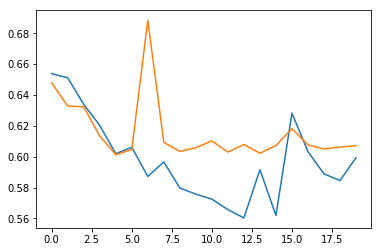

In [29]:
# Model 4: CNN + BiLSTM
np.random.seed(7)

#embedding_vecor_length = 32

data_dim = 173
timesteps = 1
num_classes = 2

inp =  Input(shape=(173, 1))

model4 = Sequential()
model4.add(Dense(32,input_shape=(data_dim, timesteps)))
model4.add(Conv1D(filters=16, kernel_size=4, activation='relu'))
model4.add(AveragePooling1D(pool_size=4, padding='same'))
model3.add(Masking(mask_value=5.))
model4.add(Bidirectional(LSTM(30, return_sequences=True,
               activation='relu')))  # returns a sequence of vectors of dimension 30
model4.add(Bidirectional(LSTM(30, return_sequences=True, activation='relu')))  # returns a sequence of vectors of dimension 30
model4.add(Bidirectional(LSTM(30,activation='relu')))  # return a single vector of dimension 30
model4.add(Dense(2, activation='softmax'))

model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  #optimizer='rmsprop'            
training4 = model4.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 10, epochs = 20, verbose = 1, callbacks=callbacks_list)

print(model4.summary())

# Extract the history from the training object
history4 = training4.history

# Plot the training loss 
plt.plot(history4['loss'])
# Plot the validation loss
plt.plot(history4['val_loss'])

# Show the figure
plt.show()

In [30]:
preds4 = model4.evaluate(x = X_test, y = y_test)

print()
print ("Loss = " + str(preds4[0]))
print ("Test Accuracy = " + str(preds4[1]))

247/247 [==============================] - 0s 1ms/step

Loss = 0.60715912662537
Test Accuracy = 0.6761133579107431
